In [4]:
## SOURCE :: https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
## SOURCE :: https://www.experfy.com/blog/ai-ml/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert/


## for data
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
## for language detection
import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

In [5]:
lst_dics = []
with open('News_Category_Dataset_v2.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
## print the first one
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [6]:
## create dtf
dtf = pd.DataFrame(lst_dics)
## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH'])       ][["category","headline"]]
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
## print 5 random rows
dtf.sample(5)

# SHOW IMAGE
# define axis
# x = "y"
# fig, ax = plt.subplots()
# fig.suptitle(x, fontsize=12)
# dtf[x].reset_index().groupby(x).count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
# plt.show()

,y,text
50682,POLITICS,Trump Rails Against Press In Response To Repor...
118790,ENTERTAINMENT,Nicki Minaj Throws Shade At Iggy Azalea At The...
8228,POLITICS,Why Jeff Sessions Hates Stoners (Or Secretly L...
36617,POLITICS,Don't March If You Won't Keep Walking
110238,POLITICS,Clinton To Hit Campaign Trail For Dems


In [7]:
# Language Detection
txt = dtf["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [8]:
# Add a column with the language information for the whole dataset

dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x)if x.strip() != "" else "")

# print head dataset
# CAUTION VERY LONG PROCESS, BE PATIENT
# show the dataset with the language column
# dtf.head()

# show repartition by lang in a graphic
# CAUTION VERY LONG PROCESS, BE PATIENT
# x = "lang"
# fig, ax = plt.subplots()
# fig.suptitle(x, fontsize=12)
# dtf[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
# plt.show()

In [20]:
# Text Preprocessing
# CAUTION VERY LONG PROCESS, BE PATIENT
print("--- original ---")
print(txt)

print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)

print("--- tokenization ---")
txt = txt.split()
print(txt)


--- original ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
--- cleaning ---
will smith joins diplo and nicky jam for the 2018 world cups official song
--- tokenization ---
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song']


In [9]:
# Load generic stop words for the English vocabulary with NLTK
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
 # remove those stop words from the first news headline

print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)


--- remove stopwords ---
['W', 'l', 'l', ' ', 'S', 'h', ' ', 'J', 'n', ' ', 'D', 'p', 'l', ' ', 'A', 'n', ' ', 'N', 'c', 'k', ' ', 'J', ' ', 'F', 'r', ' ', 'T', 'h', 'e', ' ', '2', '0', '1', '8', ' ', 'W', 'r', 'l', ' ', 'C', 'u', 'p', "'", ' ', 'O', 'f', 'f', 'c', 'l', ' ', 'S', 'n', 'g']


In [23]:
# Stemming and Lemmatization

print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])

print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['W', 'l', 'l', ' ', 'S', 'h', ' ', 'J', 'n', ' ', 'D', 'p', 'l', ' ', 'A', 'n', ' ', 'N', 'c', 'k', ' ', 'J', ' ', 'F', 'r', ' ', 'T', 'h', 'e', ' ', '2', '0', '1', '8', ' ', 'W', 'r', 'l', ' ', 'C', 'u', 'p', "'", ' ', 'O', 'f', 'f', 'c', 'l', ' ', 'S', 'n', 'g']
--- lemmatisation ---
['W', 'l', 'l', ' ', 'S', 'h', ' ', 'J', 'n', ' ', 'D', 'p', 'l', ' ', 'A', 'n', ' ', 'N', 'c', 'k', ' ', 'J', ' ', 'F', 'r', ' ', 'T', 'h', 'e', ' ', '2', '0', '1', '8', ' ', 'W', 'r', 'l', ' ', 'C', 'u', 'p', "'", ' ', 'O', 'f', 'f', 'c', 'l', ' ', 'S', 'n', 'g']


In [11]:


'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text



In [27]:


# be sure to define dtf, don't mess with the arguments
dtf["text_clean"] = dtf["text"].apply(lambda x:
utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
lst_stopwords=lst_stopwords))

# output
dtf.head()

,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,text_clean
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,smith join diplo nicky jam 2018 world cup offi...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,hugh grant marries first time age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,julianna margulies us donald trump poop bag pi...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,morgan freeman devastated sexual harassment cl...


In [28]:

# Print the first line original and then the same but cleaned
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])



Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  smith join diplo nicky jam 2018 world cup official song


In [12]:

# Length Analysis


"""
- word count: counts the number of tokens in the text (separated by a space)

- character count: sum the number of characters of each token

- sentence count: count the number of sentences (separated by a period)

- average word length: sum of words length divided by the number of words (character count/word count)

- average sentence length: sum of sentences length divided by the number of sentences (word count/sentence count)

"""
# word_count
dtf['word_count'] = dtf["text"].apply(lambda x: len(str(x).split(" ")))

# char_count
dtf['char_count'] = dtf["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

# sentence_count
dtf['sentence_count'] = dtf["text"].apply(lambda x: len(str(x).split(".")))

# avg_word_length
dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']

# avg_sentence_lenght
dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']

# ouput
dtf.head()



,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0


/Volumes/mi_disco/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Volumes/mi_disco/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Volumes/mi_disco/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidime

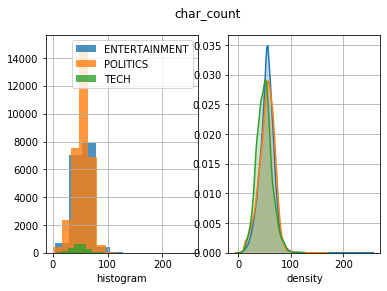

In [31]:
"""
What’s the distribution of those new variables with respect to the target? To answer that I’ll look at the bivariate distributions (how two variables move together). First, I shall split the whole set of observations into 3 samples (Politics, Entertainment, Tech), then compare the histograms and densities of the samples. If the distributions are different then the variable is predictive because the 3 groups have different patterns.
For instance, let’s see if the character count is correlated with the target variable.

"""

x, y = "char_count", "y"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()



In [13]:

# Sentiment Analysis
dtf["sentiment"] = dtf["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dtf.head()



,y,text,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,62,1,4.428571,14.0,0.000000
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,38,1,3.800000,10.0,0.250000
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,59,1,5.363636,11.0,0.136364
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en,13,59,1,4.538462,13.0,0.000000
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en,10,71,1,7.100000,10.0,0.500000


In [34]:

# output the sentiment for the first sentence
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])


Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  0.0


In [14]:
# USING SPACY

# Named-Entity Recognition

## call model
ner = spacy.load("en_core_web_lg")
## tag text
txt = dtf["text"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")


In [1]:

# CAUTION VERY LONG PROCESS, BE PATIENT
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
# dtf.head()

# output image
# Unpack the column “tags” we created in the previous code.

# not working
"""
y = "ENTERTAINMENT"
 
tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)

# change
# sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:top,:], dodge=False, ax=ax)
# sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:,:], dodge=False, ax=ax)

# sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[[0,2], [0,1]], dodge=False, ax=ax)

# exemples
# df.iloc[[0,2], [0,1]]
# print(df.iloc[:,0:4])
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:,0:4], dodge=False, ax=ax)

ax.grid(axis="x")
plt.show()
"""

NameError: name 'dtf' is not defined

In [ ]:


## predict wit NER
txt = dtf["text"].iloc[0]
entities = ner(txt).ents
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

